In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob ,os,csv
import numpy as np
import xml.etree.ElementTree as ET
import re
from xml_to_csv import xml_to_csv

In [2]:
from xml_to_csv import xml_to_csv
# xml_to_csv(r"E:\Major_project_main\Main\test_data\MVl_3239_1")

In [ ]:
def finding_radius(img_path,):
    # Get list of XML files
    img_files = glob.glob(f'{img_path}/*.jpg')
    csv_file = glob.glob(f'{img_path}/*.csv')
    
    # Open CSV file
    with open(csv_file, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['filename', 'x_center', 'y_center', 'radius'])
        
        
        for img_file in img_files:
            # Load the cropped image
            img = cv2.imread(img_file,cv2.IMREAD_UNCHANGED)
#             print(f"Image Shape:{img.shape}")

            # Convert the image from RGB to HSV color space
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # Define a lower and upper range for the red color in HSV
            lower_red = np.array([0, 10, 10])
            upper_red = np.array([10, 255, 255])
            mask1 = cv2.inRange(hsv, lower_red, upper_red)

            lower_red = np.array([170, 50, 50])
            upper_red = np.array([180, 255, 255])
            mask2 = cv2.inRange(hsv, lower_red, upper_red)

            # Combine the masks
            mask = mask1 + mask2
            # Threshold the image
            mask = cv2.bitwise_or(mask1, mask2)
            
            # Find contours
            contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

            # Filter contours
            contours = [contour for contour in contours if cv2.contourArea(contour) > 10 and cv2.arcLength(contour, True) > 10]
            # Calculate diameter
            if len(contours) > 0:
                contour = contours[0]
                (x, y), radius = cv2.minEnclosingCircle(contour)
                diameter = radius * 2
                print("Center of a ball is in ({},{}) pixal and Diameter is: {} pixels".format(x,y,diameter))
            else:
                x, y, radius = np.nan, np.nan, np.nan
                print("No red color ball found in the image.")
            
#             #for displaying
#             info = [x,y,radius]
#             display_image(img,mask,info)
            
            # Extract filename
            filename = os.path.basename(img_file)
            
            # Write to CSV file
            # writer.writerow([filename, x, y, radius])

In [53]:
def display_image(img,mask,info):
    fig, axs = plt.subplots(1, 3)
    axs[0].imshow(img)
    axs[0].set_title("Original")

    axs[1].imshow(mask)
    axs[1].set_title("Masked")
    
    x,y,radius = info[0],info[1],info[2]
    center = (int(x),int(y))
    radius = int(radius)
    circle_color = (0, 255, 0)  # Green
    thickness = 1
    cv2.circle(img, center, radius, circle_color, thickness)
    axs[2].imshow(img)
    axs[2].set_title("Ball outline")
    
    plt.show()

In [56]:
def find_radius(img):
    # img = cv2.imread(img,cv2.IMREAD_UNCHANGED)
    # print(f"Image Shape:{img.shape}")

    # Convert the image from RGB to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define a lower and upper range for the red color in HSV
    lower_red = np.array([0, 10, 10])
    upper_red = np.array([10, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    lower_red = np.array([170, 50, 50])
    upper_red = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red, upper_red)

    # Combine the masks
    mask = mask1 + mask2
    # Threshold the image
    mask = cv2.bitwise_or(mask1, mask2)
    
    # Find contours
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours
    contours = [contour for contour in contours if cv2.contourArea(contour) > 10 and cv2.arcLength(contour, True) > 10]
    # Calculate diameter
    if len(contours) > 0:
        contour = contours[0]
        (x, y), radius = cv2.minEnclosingCircle(contour)
        diameter = radius * 2
        # print("Center of a ball is in ({},{}) pixal and Diameter is: {} pixels".format(x,y,diameter))

    else:
        x, y, radius = np.nan, np.nan, np.nan
        # print("No red color ball found in the image.")

        # For Visualization
            #for displaying
    if not np.isnan(x):
        info = [x,y,radius]
        display_image(img,mask,info)
    return x,y,radius

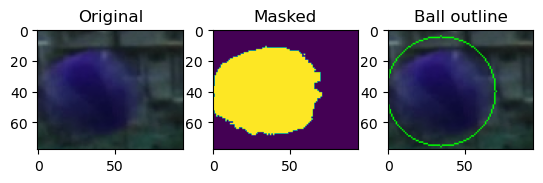

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame03_cropped.jpg


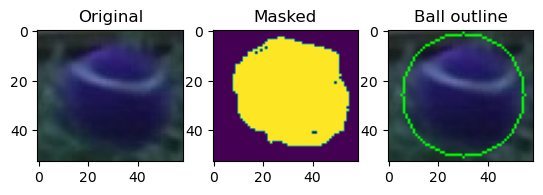

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame04_cropped.jpg


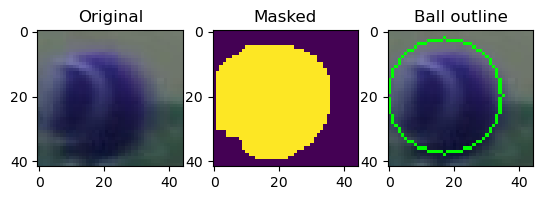

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame05_cropped.jpg


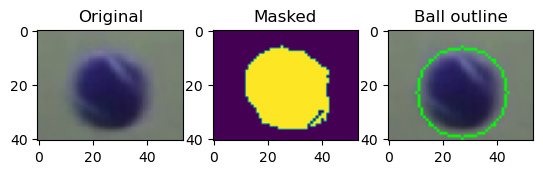

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame06_cropped.jpg


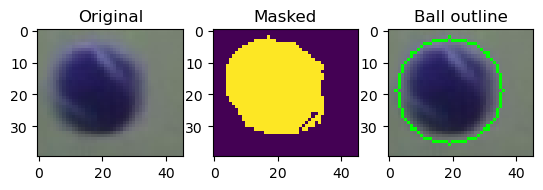

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame07_cropped.jpg


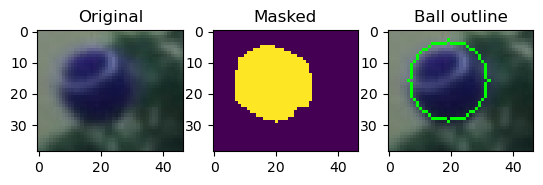

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame08_cropped.jpg


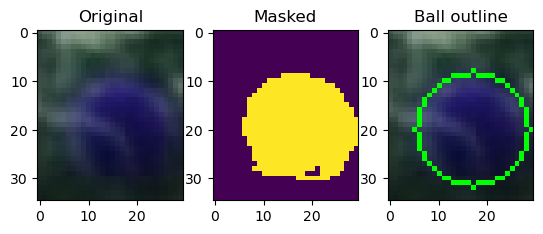

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame09_cropped.jpg


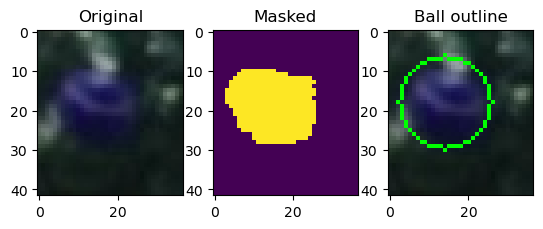

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame10_cropped.jpg


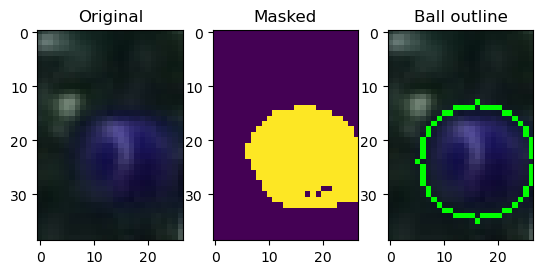

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame11_cropped.jpg


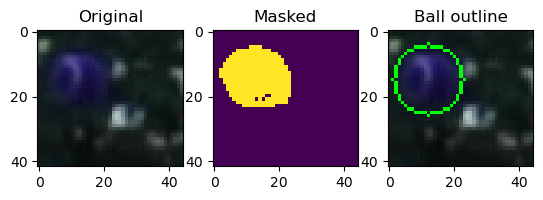

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame12_cropped.jpg


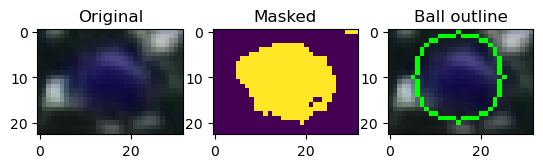

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame13_cropped.jpg


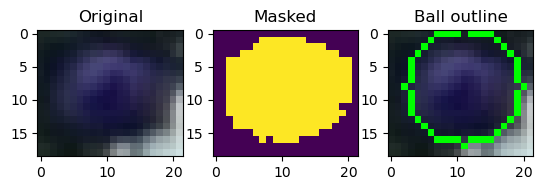

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame14_cropped.jpg


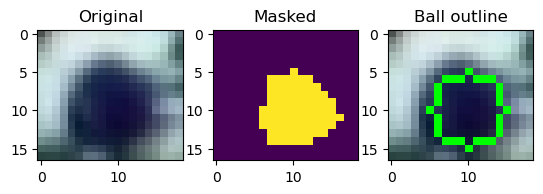

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame15_cropped.jpg


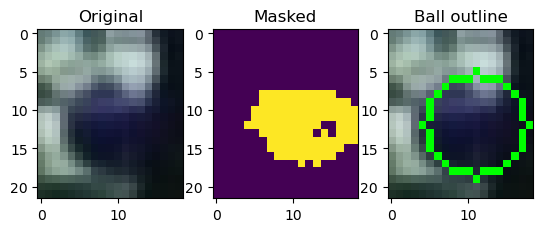

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame16_cropped.jpg


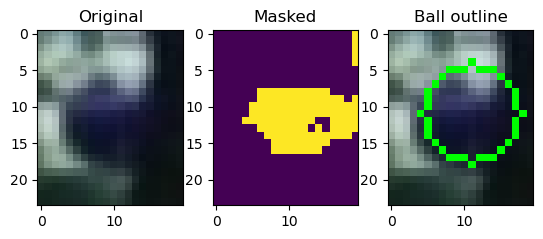

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame17_cropped.jpg


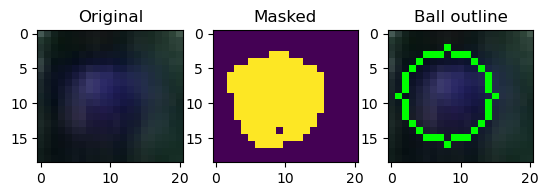

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame18_cropped.jpg


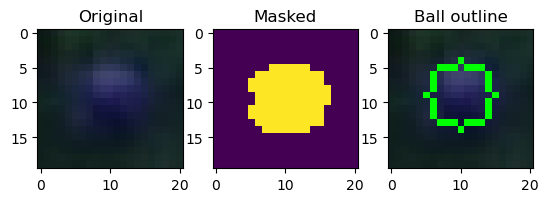

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame19_cropped.jpg


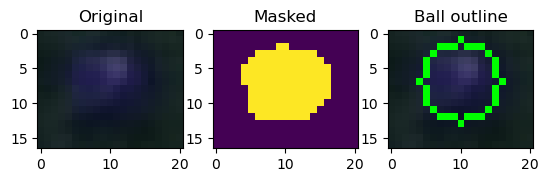

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame20_cropped.jpg


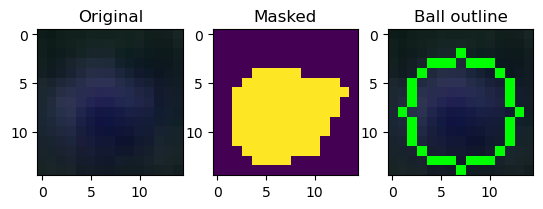

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame21_cropped.jpg


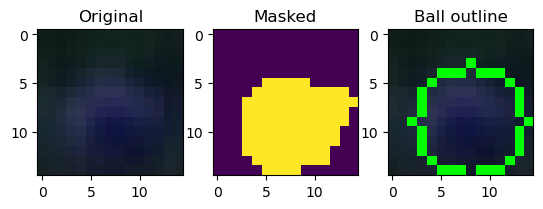

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame22_cropped.jpg


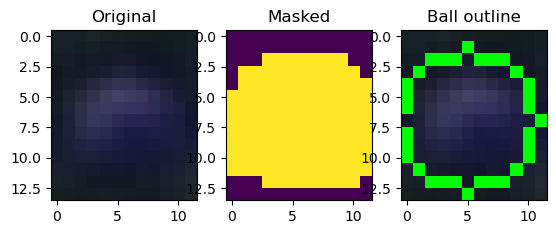

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame23_cropped.jpg


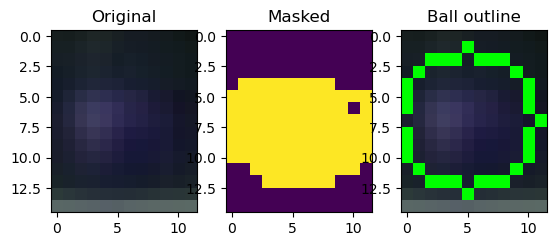

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame24_cropped.jpg


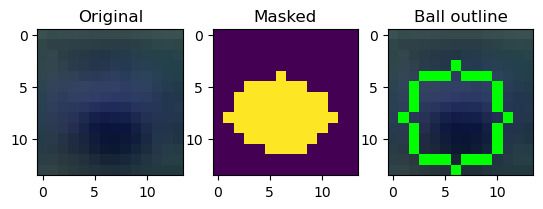

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame25_cropped.jpg


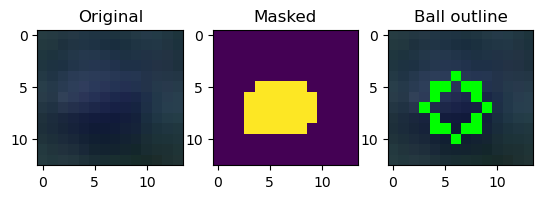

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame26_cropped.jpg


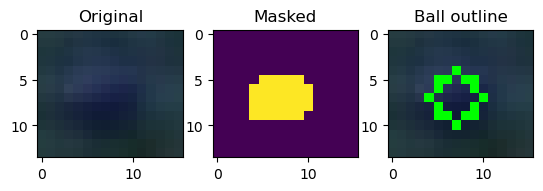

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame27_cropped.jpg


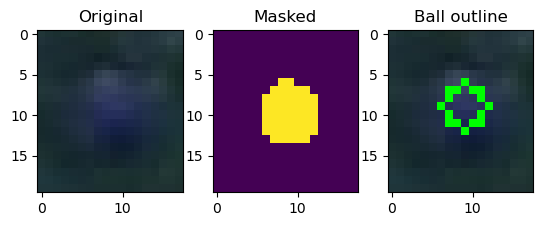

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame28_cropped.jpg


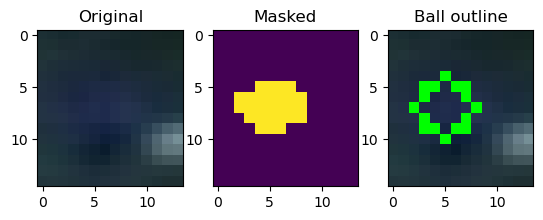

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame29_cropped.jpg


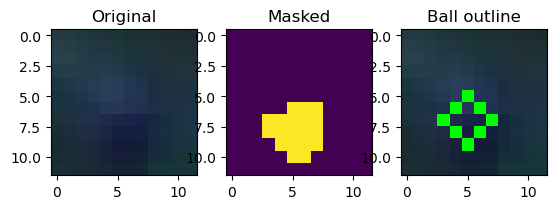

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame30_cropped.jpg


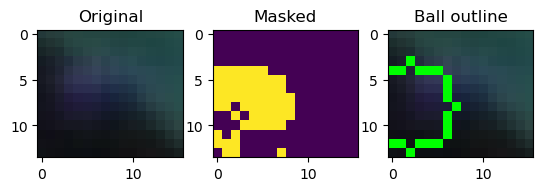

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame31_cropped.jpg


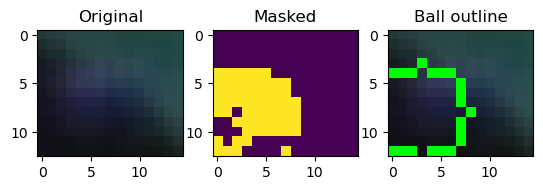

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame32_cropped.jpg


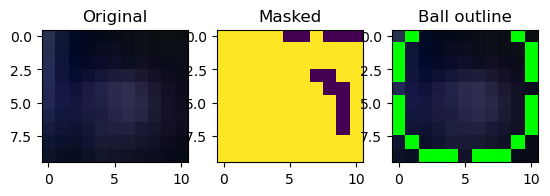

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame33_cropped.jpg


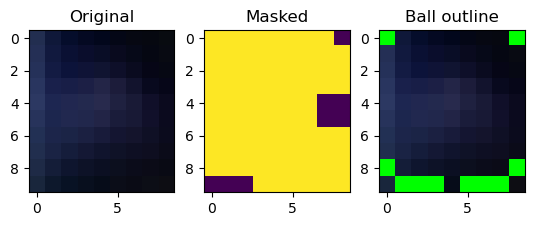

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame34_cropped.jpg


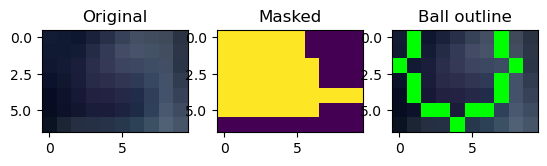

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame35_cropped.jpg


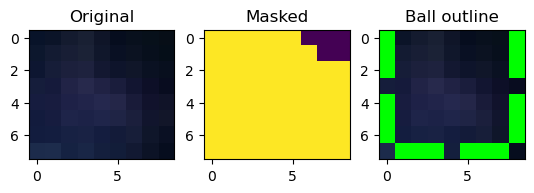

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame36_cropped.jpg


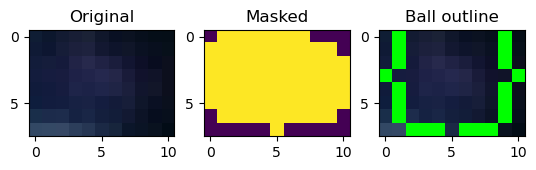

Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame37_cropped.jpg
Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame38_cropped.jpg
Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame39_cropped.jpg
Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame40_cropped.jpg
Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame41_cropped.jpg
Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame42_cropped.jpg
Writing in csvfile
Image is succesfully created and saved in ./test_data/MVl_3226_1\cropped\MVl_3226_1_frame43_cropped.jpg
succesfully created csv file


In [57]:
img_path = "./test_data/MVl_3226_1"
img_files = glob.glob(f'{img_path}/*.jpg')
try:
    csv_files = glob.glob(f'{img_path}/*.csv')
    csv_file = [csv_file for csv_file in csv_files if "annotation.csv" in csv_file][0]

    center_csv_file = os.path.join(img_path,"ball_info.csv")
    # Open CSV file
    with open(center_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['filename', 'x_center', 'y_center', 'radius'])

        # Load bounding box data from CSV
        data = pd.read_csv(csv_file)
        # print(data)

            # Iterate over each row in the CSV
        for index, row in data.iterrows():
            image_name = row['name']
            width = int(row['width'])
            height = int(row['height'])
            class_name = row['class']
            xmin = int(row['xmin'])
            ymin = int(row['ymin'])
            xmax = int(row['xmax'])
            ymax = int(row['ymax'])

            # Open the image
            image_path = os.path.join(img_path, image_name)
            image = cv2.imread(image_path,cv2.IMREAD_UNCHANGED)

            # Crop the image using the bounding box coordinates
            cropped_image = image[ymin:ymax,xmin:xmax]
            # print(cropped_image.shape)
            # Finding the x_center,y_center,radius of ball corresponding to cropped_image
            x,y,radius = find_radius(cropped_image)
            # print("Center of a ball is in ({},{}) pixal and Radius is: {} pixels".format(x,y,radius))

            

            if np.isnan(x) or np.isnan(y) or np.isnan(radius):
                x_center,y_center, radius = np.nan,np.nan,np.nan
            else:
                x_center,y_center = xmin + x,ymin + y

            writer.writerow([image_name, x_center, y_center, radius])
            print(f"Writing in csvfile")

            
            # Save the cropped image
            cropped_image_folder = os.path.join(img_path, 'cropped')
            if not os.path.exists(cropped_image_folder):
                os.makedirs(cropped_image_folder)
            cropped_image_name = f'{image_name[:-4]}_cropped.jpg'
            cropped_image_path =os.path.join(cropped_image_folder,cropped_image_name)
            cv2.imwrite(cropped_image_path,cropped_image)
            # print(f"Image is succesfully created and saved in {cropped_image_path}")
    # print("succesfully created csv file")
        
    
except:
    print("Error Occur ")
